<a href="https://colab.research.google.com/github/masitsaaa/Assignment-1/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)  # For reproducibility

# Generate 5000 samples for better model training
num_samples = 5000

data = {
    'Weather_Condition': np.random.choice([1, 2, 3, 4], num_samples, p=[0.6, 0.3, 0.05, 0.05]),
    'Road_Type': np.random.choice([1, 2, 3], num_samples, p=[0.5, 0.3, 0.2]),
    'Speed_Limit': np.random.choice([30, 50, 60, 70, 80], num_samples, p=[0.3, 0.4, 0.1, 0.1, 0.1]),
    'Vehicle_Type': np.random.choice([1, 2, 3, 4, 5], num_samples, p=[0.7, 0.1, 0.1, 0.05, 0.05]),
    'Driver_Age': np.random.normal(loc=35, scale=10, size=num_samples).astype(int),
    'Time_of_Day': np.random.choice([1, 2, 3], num_samples, p=[0.6, 0.3, 0.1]),
    'Alcohol_Involved': np.random.choice([0, 1], num_samples, p=[0.85, 0.15]),
    'Accident_Severity': np.random.choice([1, 2, 3], num_samples, p=[0.7, 0.2, 0.1])
}

# Ensure age is within valid range
data['Driver_Age'] = np.clip(data['Driver_Age'], 18, 80)

df = pd.DataFrame(data)

# Add some correlation to make the synthetic data more realistic
df.loc[df['Alcohol_Involved'] == 1, 'Accident_Severity'] = np.random.choice([2, 3], size=len(df[df['Alcohol_Involved'] == 1]), p=[0.4, 0.6])
df.loc[df['Speed_Limit'] == 80, 'Accident_Severity'] = np.random.choice([2, 3], size=len(df[df['Speed_Limit'] == 80]), p=[0.3, 0.7])

# Show the first 5 rows
df.head()

,Weather_Condition,Road_Type,Speed_Limit,Vehicle_Type,Driver_Age,Time_of_Day,Alcohol_Involved,Accident_Severity
0,1,1,50,1,26,1,0,1
1,4,1,50,2,40,2,0,2
2,2,3,30,1,48,3,0,2
3,1,1,50,1,22,1,1,2
4,1,3,50,1,52,1,0,1


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Weather_Condition  5000 non-null   int64
 1   Road_Type          5000 non-null   int64
 2   Speed_Limit        5000 non-null   int64
 3   Vehicle_Type       5000 non-null   int64
 4   Driver_Age         5000 non-null   int64
 5   Time_of_Day        5000 non-null   int64
 6   Alcohol_Involved   5000 non-null   int64
 7   Accident_Severity  5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB
None

Descriptive Statistics:
       Weather_Condition    Road_Type  Speed_Limit  Vehicle_Type   Driver_Age  \
count        5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean            1.547200     1.677400    50.118000      1.664400    34.840200   
std             0.802684     0.777078    16.233878      1.160535     9.631117   
min             1.000000  

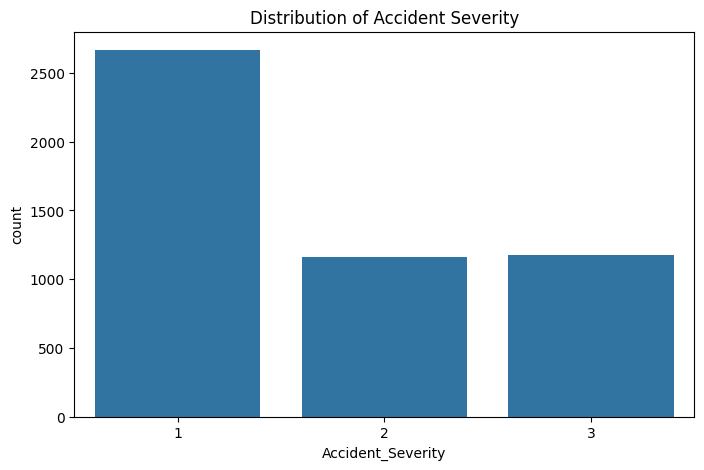

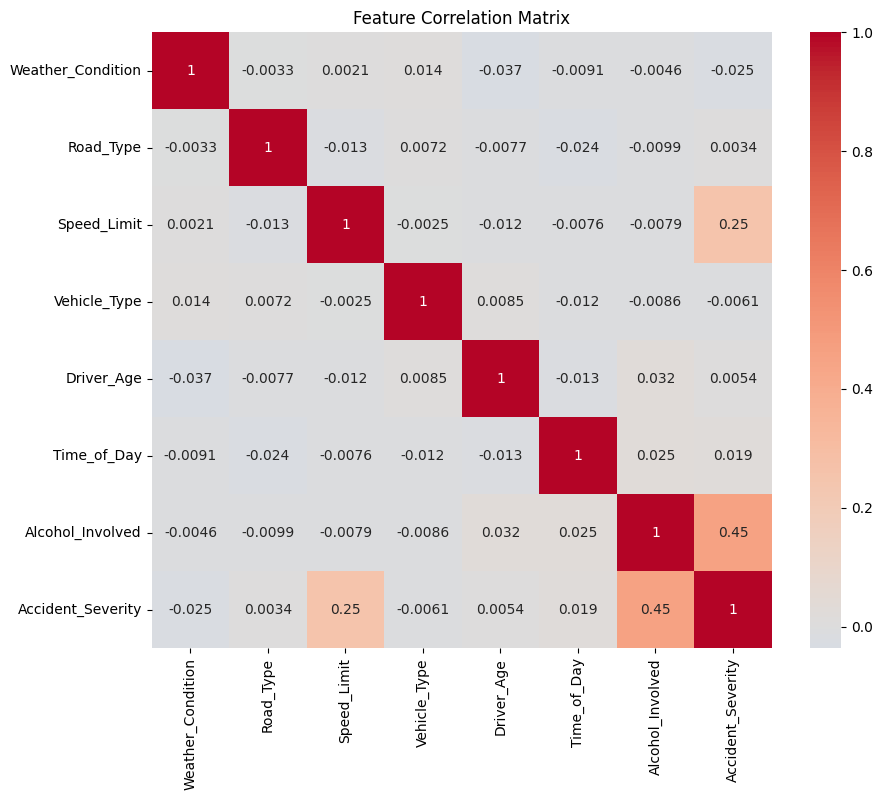

In [4]:
print("Dataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

# Visualize the target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [6]:
# Prepare features and target
X = df.drop('Accident_Severity', axis=1)
y = df['Accident_Severity']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
num_cols = ['Speed_Limit', 'Driver_Age']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4000, 7)
Testing set shape: (1000, 7)


In [7]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(model, 'accident_severity_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model trained and saved successfully!")

Model trained and saved successfully!


Model Performance Metrics:
- Mean Squared Error (MSE): 0.4866
- Root Mean Squared Error (RMSE): 0.6975
- R-squared (R²): 0.3035


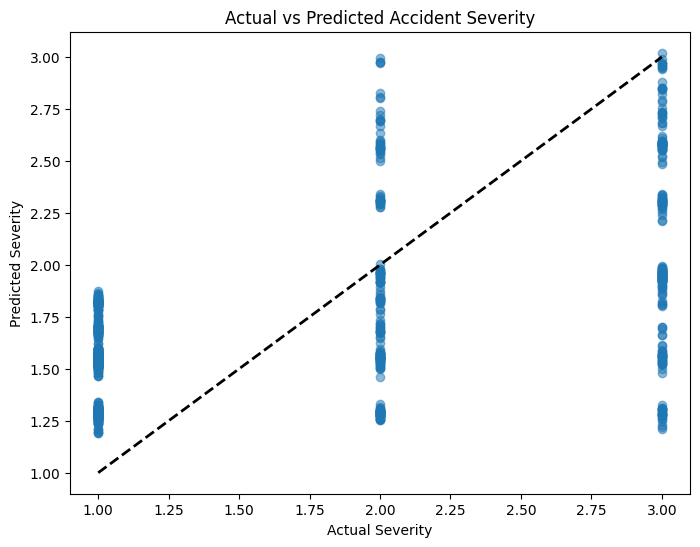

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance Metrics:")
print(f"- Mean Squared Error (MSE): {mse:.4f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"- R-squared (R²): {r2:.4f}")

# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Severity')
plt.ylabel('Predicted Severity')
plt.title('Actual vs Predicted Accident Severity')
plt.show()